<div dir="rtl">
    <div style="text-align: center;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">بسمه تعالی</h1>
</div>

<h1 align="left">🌟 Project Title:</h1>
<h3 align="center">🚀 <b>Intelligent Oil Price Prediction Using Advanced Machine Learning Models and Neural Networks</b></h3>

<div style="text-align: center;">
    <a href="https://github.com/M-RezaeiGH">
        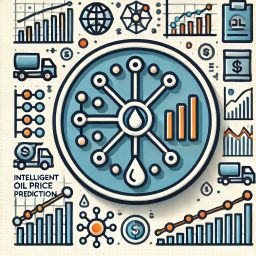
    </a>
</div>

<br><hr><br>

<h1 align="left">👨‍💻 Developer:</h1>
<h3 align="left">*** Mohammad Reza Rezaei ***</h3>

<div align="left">
  🔗 <a href="https://www.linkedin.com/in/m-rezaei/">LinkedIn</a> | 
  📂 <a href="https://github.com/M-RezaeiGH">GitHub</a>
</div>


##

## 📊 Dataset Introduction:
The dataset contains **1,262,329 rows** of real crude oil price data, which includes the following columns:

1. 📅 **DATE**: The date corresponding to the oil price.
2. ⏰ **TIME**: The time associated with the oil price.
3. 💰 **OPEN**: The opening price of oil at a specific time.
4. 📈 **HIGH**: The highest price of oil at a specific time.
5. 📉 **LOW**: The lowest price of oil at a specific time.
6. 🔒 **CLOSE**: The closing price of oil at a specific time.
7. 🔄 **TICKVOL**: The number of times the price of an asset (oil) has changed within a specific time frame. Higher TICKVOL indicates more price volatility and higher trading volume.
8. 📦 **VOL**: The total number of units of oil (barrels) traded within a specific time frame. VOL is crucial for determining the strength of a trend.
9. 📊 **SPREAD**: The difference between the bid price and the ask price at a given time. Values of 0, 1, and 2 indicate different spread levels (0 for tight, 1 for medium, 2 for wider spread).


##

<div style="text-align: left;">
    <p style="font-weight: bold;font-size: 20px; text-align: justify;">
       &star;Step Six: Implementing the LSTM Algorithm
    </p>
    <p style="font-weight: bold;font-size: 20px;text-align: justify;">
    Notebook Description:
    </p>
    <p style="font-size: 18px; text-align: justify;">
        The LSTM, which stands for Long Short-Term Memory, is a type of recurrent neural network (RNN) designed for processing sequential data such as text, speech, and time series. 
        LSTMs were specifically developed to solve the vanishing gradient problem in traditional RNNs, where error gradients rapidly diminish over time, making it challenging to train deep networks.
            LSTMs can be used to predict future values in a time series, such as forecasting prices.
    </p>
</div>


<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Installation: </h1>
    </div>
</div>

In [1]:
# pip install tensorflow==2.12.0

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Import Necessary Libraries: </h1>
    </div>
</div>

In [2]:
# from src import DATA_DIR
import pandas as pd
import numpy as np
from numpy import where
from datetime import datetime
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import iqr
from scipy.stats import probplot
from scipy import stats
from pylab import rcParams
from plotly import tools
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM, LSTM, BatchNormalization
import keras
import pickle

import pkg_resources
import warnings
warnings.filterwarnings('ignore')

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Version Auto-Code: </h1>
    </div>
</div>

In [3]:
import pkg_resources

def get_package_version(package_name):
    try:
        package_version = pkg_resources.get_distribution(package_name).version
        return package_version
    except pkg_resources.DistributionNotFound:
        return None

imported_libraries = ['numpy', 'pandas','seaborn','matplotlib','scipy','plotly','IPython','numba','prophet','sklearn',
                      'tensorflow', 'pickle','keras']

for library in imported_libraries:
    version = get_package_version(library)
    if version:
        print(f"{library}: {version}")
    else:
        print(f"{library}: Not found")

numpy: 1.23.5
pandas: 1.5.3
seaborn: 0.12.2
matplotlib: 3.6.3
scipy: 1.9.3
plotly: 5.24.0
IPython: 8.11.0
numba: 0.57.0
prophet: 1.1.5
sklearn: Not found
tensorflow: 2.12.0
pickle: Not found
keras: 2.12.0


<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Read Data from my SRC folder: </h1>
    </div>
</div>

In [4]:
# for open in Google Colab:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# # مسير فايل اين گام در كامپيوتر شما:
print(DATA_DIR)
file_path = DATA_DIR / "Datasets" / "WTI_Oilc.csv"
df = pd.read_csv(file_path, parse_dates=True, squeeze=True)
df.head()

D:\Desktop File\New folder\src


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2006.02.03,00:00:00,64.77,65.48,63.93,65.37,251,0,0
1,2006.02.06,00:00:00,66.35,66.50,64.77,65.11,223,0,0
2,2006.02.07,00:00:00,64.84,64.90,62.81,63.09,244,0,0
3,2006.02.08,00:00:00,62.96,63.44,62.29,62.55,190,0,0
4,2006.02.09,00:00:00,62.68,63.73,62.38,62.62,265,0,0


In [6]:
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_columns)

['<DATE>', '<TIME>']


In [7]:
df.columns = ["Date", "Time", "Open", "High", "Low", "Close", "Tickvol","Vol", "Spread"]
df["Date"] = pd.to_datetime(df["Date"])
print(df.shape)
df.head()

(1262327, 9)


,Date,Time,Open,High,Low,Close,Tickvol,Vol,Spread
0,2006-02-03,00:00:00,64.77,65.48,63.93,65.37,251,0,0
1,2006-02-06,00:00:00,66.35,66.50,64.77,65.11,223,0,0
2,2006-02-07,00:00:00,64.84,64.90,62.81,63.09,244,0,0
3,2006-02-08,00:00:00,62.96,63.44,62.29,62.55,190,0,0
4,2006-02-09,00:00:00,62.68,63.73,62.38,62.62,265,0,0


<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Analysis of the Impact of Other Columns on the DATE Column:</h1>
</div>


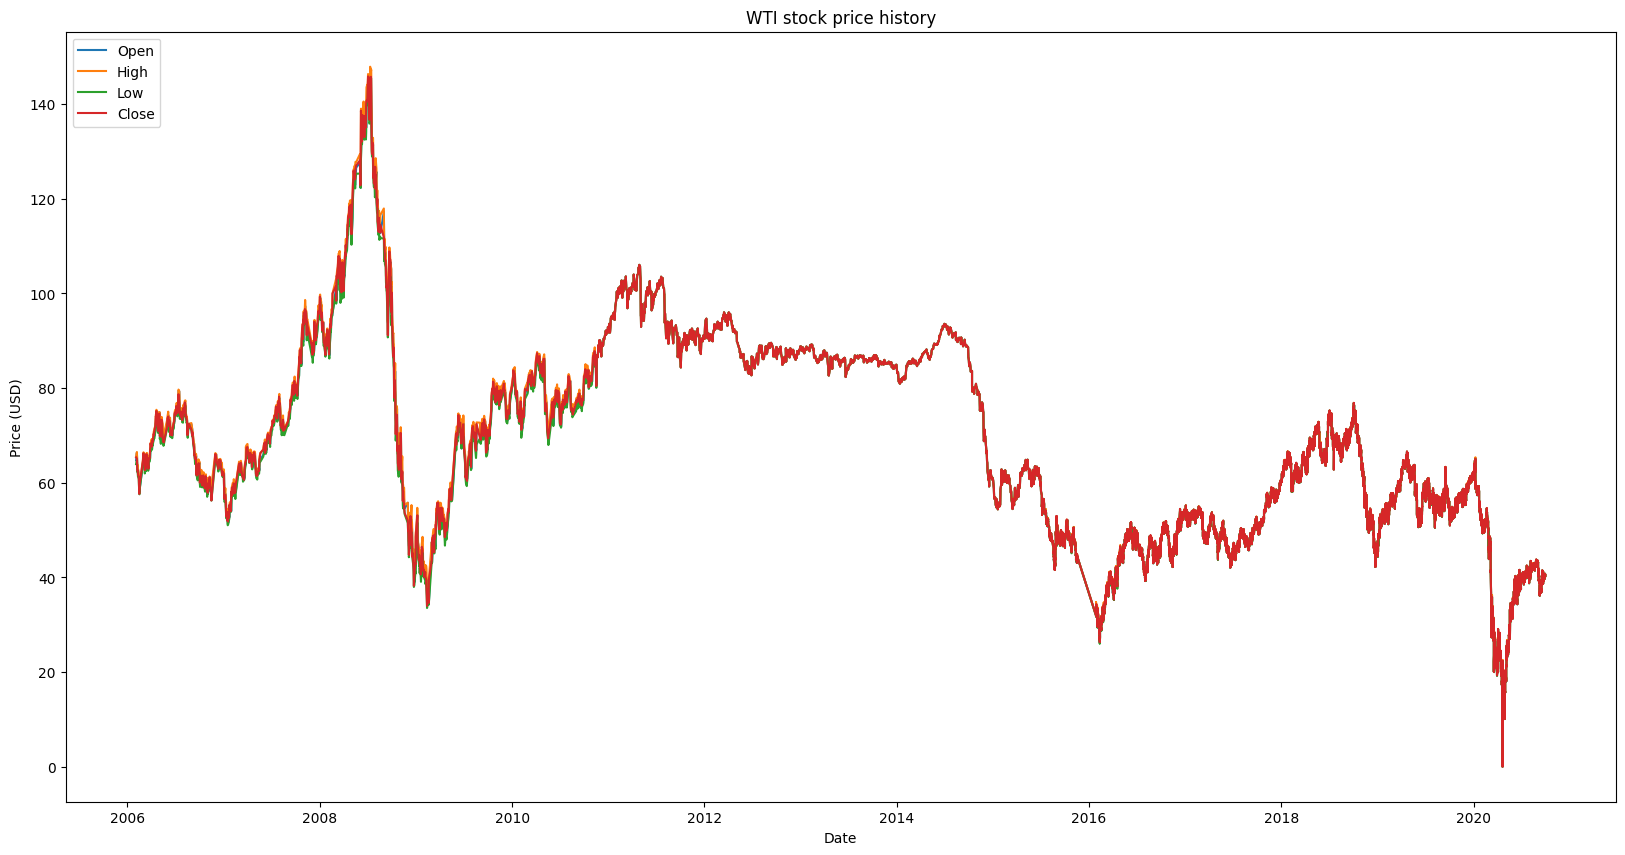

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Open"])
plt.plot(df["Date"], df["High"])
plt.plot(df["Date"], df["Low"])
plt.plot(df["Date"], df["Close"])
plt.title('WTI stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend(["Open", "High", "Low", "Close"], loc='upper left')
plt.show()

### &#9899; Result:
So we see that columns of " open, high, low " and close prices don’t vary too much

##### **<span style="color: red; font-weight: bold;">* in the basis of this result, we consider two column of DATE and CLOSE as much important features which effect our algorithms.*</span>**

##

<div style="text-align: left;">
    <h1 style = "font-size:26px;font-weight: bold;">&star; Dropping features and continuing with only Date and Close columns:</h1>
</div>


In [9]:
# بر اساس كامنت بالا
# حذف ستونهاي اضافي 
df = df.drop(columns=["Time", "Open", "High", "Low","Tickvol","Vol", "Spread"])
# df = df[["Date", "Close"]]  # روش دوم
df.head()

,Date,Close
0,2006-02-03,65.37
1,2006-02-06,65.11
2,2006-02-07,63.09
3,2006-02-08,62.55
4,2006-02-09,62.62


<div style="text-align: left;">
    <h1 style = "font-size:26px;font-weight: bold;">&star; Considering working days from February 3, 2006, to September 29, 2020:</h1>
</div>


In [10]:
# first day and last day of the DATE column:
min_date = df['Date'].min()
max_date = df['Date'].max()
print(f"محدوده تاریخ: از ({min_date}) تا ({max_date})")

محدوده تاریخ: از (2006-02-03 00:00:00) تا (2020-09-29 00:00:00)


In [11]:
range_ = pd.date_range('2006-02-03', '2020-09-29', freq='B') # B: Business Days
range_

DatetimeIndex(['2006-02-03', '2006-02-06', '2006-02-07', '2006-02-08',
               '2006-02-09', '2006-02-10', '2006-02-13', '2006-02-14',
               '2006-02-15', '2006-02-16',
               ...
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-28', '2020-09-29'],
              dtype='datetime64[ns]', length=3823, freq='B')

##

<div style="text-align: left;">
    <h1 style = "font-size:26px;font-weight: bold;">&star; Calculating the average closing price for each working day and creating a new DataFrame:</h1>
</div>


In [12]:
# Checking the days that have more than one price value:

# Checking if a specific date has multiple different values for CLOSE
duplicate_close_dates = df.groupby('Date')['Close'].nunique()

# Filtering dates that have more than one CLOSE value
multiple_close_dates = duplicate_close_dates[duplicate_close_dates > 1]

print(multiple_close_dates)


Date
2010-12-01      2
2011-01-05      2
2011-01-26      2
2011-02-17      2
2011-02-23      2
             ... 
2020-09-23    115
2020-09-24    104
2020-09-25     88
2020-09-28     98
2020-09-29     46
Name: Close, Length: 1448, dtype: int64


In [13]:
# for day in range_:
#     print(np.array(df[df["Date"] == day]["Close"]))

In [14]:
data = []
for day in range_:
  temp = []
  temp.append(day.date())
  temp.append(round(np.mean(np.array(df[df["Date"] == day]["Close"])),2))
  data.append(temp)
new_df = pd.DataFrame(data)
print(new_df.shape)
new_df.head()

(3823, 2)


,0,1
0,2006-02-03,65.37
1,2006-02-06,65.11
2,2006-02-07,63.09
3,2006-02-08,62.55
4,2006-02-09,62.62


<div dir="ltr";style="text-align: LEFT;">
        <h1 style = "font-size:26px;font-weight: bold;">&star; Drop Null Values:</h1>
</div>

In [15]:
num_nans = new_df.isnull().sum(axis = 0)
new_df.dropna(inplace=True)
new_df.columns = ["Date", "Close"]
new_df.set_index("Date", inplace=True)
new_df.head()

,Close
Date,
2006-02-03,65.37
2006-02-06,65.11
2006-02-07,63.09
2006-02-08,62.55
2006-02-09,62.62


<div style="text-align: left;">
    <h1 style="font-size:26px;">Keeping dates separately for use in plotting (optional):</h1>
</div>


In [16]:
date_index = new_df.index.values
date_index

array([datetime.date(2006, 2, 3), datetime.date(2006, 2, 6),
       datetime.date(2006, 2, 7), ..., datetime.date(2020, 9, 25),
       datetime.date(2020, 9, 28), datetime.date(2020, 9, 29)],
      dtype=object)

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Converting the original data to a Numpy Array:</h1>
</div>


In [17]:
df_array = np.array(new_df)
shape_df = df_array.shape
shape_df

(3571, 1)

In [18]:
data = np.array(df_array).reshape(-1, 1)
data

array([[65.37],
       [65.11],
       [63.09],
       ...,
       [40.23],
       [40.21],
       [40.35]])

##

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star;Scaling the data using Min-Max Scaler:</h1>
</div>


In [19]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [20]:
data = scaler.fit_transform(data)
data.shape

(3571, 1)

In [21]:
# Pickle & Saving Scaler for future use:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

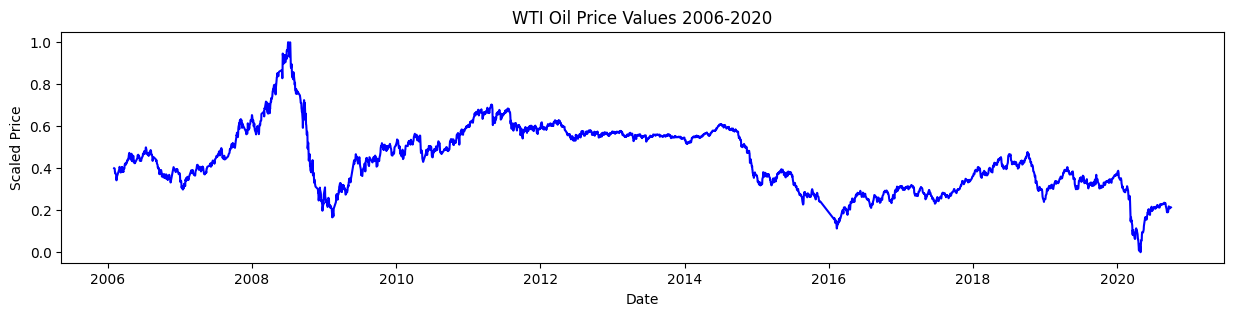

In [22]:
fig = plt.figure(figsize=(15,3))
plt.plot(date_index, data, color='blue')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.title('WTI Oil Price Values 2006-2020')
plt.show()

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Splitting data:</h1>
</div>

In [23]:
# Calculate the size of training and testing data
train_size = int(len(data) * 0.8)

# Split data into training and testing sets
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]   

# Split dates into training and testing sets for use in future plots
train_dates, test_dates = date_index[0:train_size], date_index[train_size:len(data)]

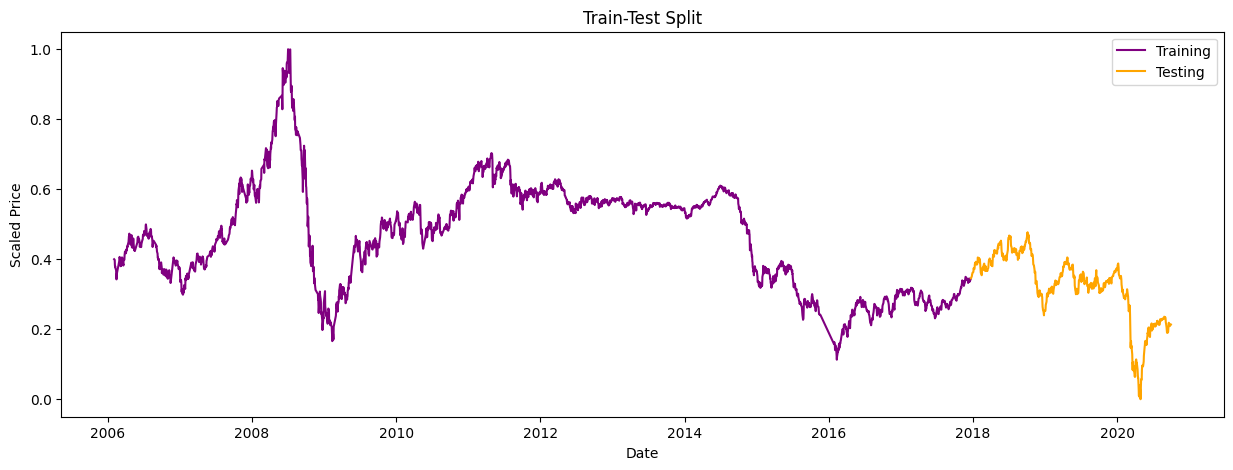

In [24]:
#displays a plot of the train/test split
plt.figure(figsize=(15,5))
plt.plot(train_dates, train_data, color='purple', label='Training')
plt.plot(test_dates, test_data, color='orange', label='Testing')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.title('Train-Test Split')
plt.legend()
plt.show()

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; create_dataset function:</h1>
    <p style="font-size: 20px; text-align: justify;">
        The create_dataset function transforms time series data into sequences suitable for training sequence-based models. 
        This function prepares the time series data for use in deep learning models, particularly LSTM neural networks.
    </p>
    <p style="font-size: 20px; text-align: justify;">
        This process involves converting the data into sequences of values where each sequence serves as input for the model, 
        and the next value in the sequence is considered as the output.
    </p>
    <h1 style="font-size:26px;font-weight: bold;"> timestep (optional): </h1>
    <p style="font-size: 20px; text-align: justify;">
        An integer that specifies the number of past time steps in each sequence. The default is 1.
    </p>
</div>


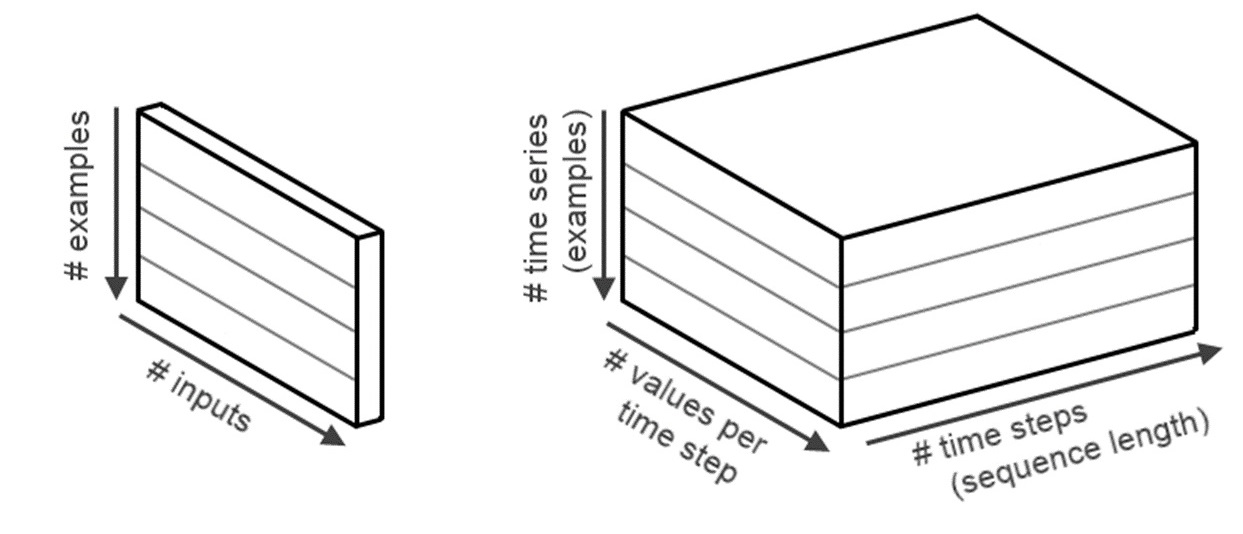

In [25]:
def create_dataset(dataset, timestep=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - timestep - 1):
        dataX.append(dataset[i:i+timestep])  #First data from array
        dataY.append(dataset[i+timestep])    #second data from array
    return np.array(dataX).astype('float32'), np.array(dataY).astype('float32')

In [26]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [27]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [28]:
print(X_train.shape)
print(X_test.shape)

(2755, 100, 1)
(614, 100, 1)


In [29]:
# #Second Approach:
# def create_dataset2(dataset, window_size = 1):
#     dataX, dataY = [], []
#     for i in range(len(dataset) - window_size - 1):
#         a = dataset[i:(i + window_size), 0]
#         data_X.append(a)
#         data_Y.append(dataset[i + window_size, 0])
#     return np.array(dataX).astype('float32'), np.array(dataY).astype('float32')

# # Create test and training sets for one-step-ahead regression.
# window_size = 100
# X_train, y_train = create_dataset(train_data, window_size)
# X_test, y_test = create_dataset(test_data, window_size)
# print("Original training data shape:")
# print(X_train.shape)

# # Reshape the input data into appropriate form for Keras.
# train_X = np.reshape(X_train, (X_train.shape[0], window_size, X_train.shape[1]))
# test_X = np.reshape(X_test, (test_X.shape[0], window_size, X_test.shape[1]))
# print("New training data shape:")
# print(X_train.shape)
# print(X_test.shape)

##

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Building and training First LSTM model:</h1>
</div>

In [30]:
# Early Stopping Callback:
# patience: Specifies the number of epochs that the model is allowed to continue training 
# without improvement in the monitored value (or validation loss).
# If no improvement is observed after this number of epochs, training will stop.
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=7, 
                               restore_best_weights=True)

In [31]:
# Define the path where the model.h5 will be saved:
# src use for determination of path:  from src import DATA_DIR
print(DATA_DIR)
model1_save_path = DATA_DIR / "BestModel_H5" / "model1_h5"
model1_save_path

D:\Desktop File\New folder\src


WindowsPath('D:/Desktop File/New folder/src/BestModel_H5/model1_h5')

In [32]:
# This callback allows you to save the best weights of the model or periodically save weights during training.
# It is useful when you want to continue from a specific point in case of an unexpected interruption in training.
# Not necessary to use in this notebook:

checkpoint = ModelCheckpoint(model1_save_path, 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='min', 
                             verbose=1)


In [33]:
# Building an LSTM model
model1 = tf.keras.models.Sequential()

# First LSTM layer with 50 units
# return_sequences=True ensures that the output of this LSTM layer will be a sequence, needed for stacking LSTM layers
model1.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(time_step, 1)))

# Second LSTM layer with 100 units
# return_sequences=True since this is not the final LSTM layer, and we need the sequence output for further layers
model1.add(tf.keras.layers.LSTM(100, return_sequences=True))

# Dropout layer to reduce overfitting, randomly dropping 50% of the neurons
model1.add(tf.keras.layers.Dropout(0.5))

# Third LSTM layer with 200 units
# return_sequences=False because this is the last LSTM layer and we only need the final output
model1.add(tf.keras.layers.LSTM(200))

# Another Dropout layer with a 25% dropout rate to prevent overfitting
model1.add(tf.keras.layers.Dropout(0.25))

# Dense layer with 100 neurons for further processing of the output
model1.add(tf.keras.layers.Dense(100))

# Dropout layer with a 25% dropout rate
model1.add(tf.keras.layers.Dropout(0.25))

# Output Dense layer with 1 neuron, suitable for regression (predicting a single continuous value)
model1.add(tf.keras.layers.Dense(1))

# Compile the model:
# loss='mean_squared_error' is used as the loss function for regression tasks
# optimizer='adam' is the optimizer for training, known for its efficiency and adaptive learning rate
model1.compile(loss='mean_squared_error', optimizer='adam')

# Print the model summary to display the architecture and number of parameters
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 100)          60400     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 200)               240800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0

In [34]:
# Train the model with both callbacks
history1 = model1.fit(X_train, y_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_test, y_test), 
                      callbacks=[early_stopping, checkpoint],
                      verbose=1)

Epoch 1/100
87/87 [==============================] - ETA: 0s - loss: 0.0121
Epoch 1: val_loss improved from inf to 0.00110, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 40s 402ms/step - loss: 0.0121 - val_loss: 0.0011
Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 0.0032
Epoch 2: val_loss improved from 0.00110 to 0.00090, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 34s 398ms/step - loss: 0.0032 - val_loss: 8.9566e-04
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 0.0029
Epoch 3: val_loss improved from 0.00090 to 0.00080, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 52s 598ms/step - loss: 0.0029 - val_loss: 7.9790e-04
Epoch 4/100
87/87 [==============================] - ETA: 0s - loss: 0.0023
Epoch 4: val_loss did not improve from 0.00080
87/87 [==============================] - 51s 590ms/step - loss: 0.0023 - val_loss: 8.5676e-04
Epoch 5/100
87/87 [==============================] - ETA: 0s - loss: 0.0021
Epoch 5: val_loss did not improve from 0.00080
87/87 [==============================] - 52s 596ms/step - loss: 0.0021 - val_loss: 9.2829e-04
Epoch 6/100
87/87 [==============================] - ETA: 0s - loss: 0.0018
Epoch 6: val_loss improved from 0.00080 to 0.00066, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 61s 701ms/step - loss: 0.0018 - val_loss: 6.6175e-04
Epoch 7/100
87/87 [==============================] - ETA: 0s - loss: 0.0018
Epoch 7: val_loss improved from 0.00066 to 0.00065, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 46s 525ms/step - loss: 0.0018 - val_loss: 6.4711e-04
Epoch 8/100
87/87 [==============================] - ETA: 0s - loss: 0.0015
Epoch 8: val_loss improved from 0.00065 to 0.00049, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 51s 592ms/step - loss: 0.0015 - val_loss: 4.9499e-04
Epoch 9/100
87/87 [==============================] - ETA: 0s - loss: 0.0015
Epoch 9: val_loss did not improve from 0.00049
87/87 [==============================] - 47s 544ms/step - loss: 0.0015 - val_loss: 5.3632e-04
Epoch 10/100
87/87 [==============================] - ETA: 0s - loss: 0.0014
Epoch 10: val_loss did not improve from 0.00049
87/87 [==============================] - 46s 528ms/step - loss: 0.0014 - val_loss: 6.8434e-04
Epoch 11/100
87/87 [==============================] - ETA: 0s - loss: 0.0017
Epoch 11: val_loss improved from 0.00049 to 0.00043, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 54s 620ms/step - loss: 0.0017 - val_loss: 4.3272e-04
Epoch 12/100
87/87 [==============================] - ETA: 0s - loss: 0.0013
Epoch 12: val_loss did not improve from 0.00043
87/87 [==============================] - 49s 564ms/step - loss: 0.0013 - val_loss: 5.3754e-04
Epoch 13/100
87/87 [==============================] - ETA: 0s - loss: 0.0013
Epoch 13: val_loss did not improve from 0.00043
87/87 [==============================] - 50s 580ms/step - loss: 0.0013 - val_loss: 6.2597e-04
Epoch 14/100
87/87 [==============================] - ETA: 0s - loss: 0.0013
Epoch 14: val_loss improved from 0.00043 to 0.00039, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 64s 740ms/step - loss: 0.0013 - val_loss: 3.8750e-04
Epoch 15/100
87/87 [==============================] - ETA: 0s - loss: 0.0012
Epoch 15: val_loss did not improve from 0.00039
87/87 [==============================] - 49s 559ms/step - loss: 0.0012 - val_loss: 4.6336e-04
Epoch 16/100
87/87 [==============================] - ETA: 0s - loss: 0.0013
Epoch 16: val_loss improved from 0.00039 to 0.00038, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 62s 710ms/step - loss: 0.0013 - val_loss: 3.7916e-04
Epoch 17/100
87/87 [==============================] - ETA: 0s - loss: 0.0012
Epoch 17: val_loss improved from 0.00038 to 0.00036, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 47s 543ms/step - loss: 0.0012 - val_loss: 3.6173e-04
Epoch 18/100
87/87 [==============================] - ETA: 0s - loss: 0.0013
Epoch 18: val_loss did not improve from 0.00036
87/87 [==============================] - 59s 675ms/step - loss: 0.0013 - val_loss: 5.4787e-04
Epoch 19/100
87/87 [==============================] - ETA: 0s - loss: 0.0013
Epoch 19: val_loss did not improve from 0.00036
87/87 [==============================] - 62s 714ms/step - loss: 0.0013 - val_loss: 6.5560e-04
Epoch 20/100
87/87 [==============================] - ETA: 0s - loss: 0.0011
Epoch 20: val_loss did not improve from 0.00036
87/87 [==============================] - 60s 690ms/step - loss: 0.0011 - val_loss: 4.9394e-04
Epoch 21/100
87/87 [==============================] - ETA: 0s - loss: 0.0011
Epoch 21: val_loss improved from 0.00036 to 0.00036, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 73s 845ms/step - loss: 0.0011 - val_loss: 3.5508e-04
Epoch 22/100
87/87 [==============================] - ETA: 0s - loss: 0.0011
Epoch 22: val_loss did not improve from 0.00036
87/87 [==============================] - 59s 682ms/step - loss: 0.0011 - val_loss: 3.6403e-04
Epoch 23/100
87/87 [==============================] - ETA: 0s - loss: 0.0011
Epoch 23: val_loss did not improve from 0.00036
87/87 [==============================] - 55s 631ms/step - loss: 0.0011 - val_loss: 4.4914e-04
Epoch 24/100
87/87 [==============================] - ETA: 0s - loss: 0.0011
Epoch 24: val_loss did not improve from 0.00036
87/87 [==============================] - 57s 654ms/step - loss: 0.0011 - val_loss: 4.6534e-04
Epoch 25/100
87/87 [==============================] - ETA: 0s - loss: 0.0011
Epoch 25: val_loss improved from 0.00036 to 0.00030, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 66s 759ms/step - loss: 0.0011 - val_loss: 2.9871e-04
Epoch 26/100
87/87 [==============================] - ETA: 0s - loss: 9.8314e-04
Epoch 26: val_loss did not improve from 0.00030
87/87 [==============================] - 57s 651ms/step - loss: 9.8314e-04 - val_loss: 3.8323e-04
Epoch 27/100
87/87 [==============================] - ETA: 0s - loss: 0.0010
Epoch 27: val_loss did not improve from 0.00030
87/87 [==============================] - 51s 591ms/step - loss: 0.0010 - val_loss: 3.2335e-04
Epoch 28/100
87/87 [==============================] - ETA: 0s - loss: 9.4597e-04
Epoch 28: val_loss did not improve from 0.00030
87/87 [==============================] - 49s 567ms/step - loss: 9.4597e-04 - val_loss: 3.9405e-04
Epoch 29/100
87/87 [==============================] - ETA: 0s - loss: 9.9017e-04
Epoch 29: val_loss improved from 0.00030 to 0.00024, saving model to D:\Desktop File\New folder\src\BestModel_H5\model1_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 58s 671ms/step - loss: 9.9017e-04 - val_loss: 2.3886e-04
Epoch 30/100
87/87 [==============================] - ETA: 0s - loss: 9.9316e-04
Epoch 30: val_loss did not improve from 0.00024
87/87 [==============================] - 37s 427ms/step - loss: 9.9316e-04 - val_loss: 3.8113e-04
Epoch 31/100
87/87 [==============================] - ETA: 0s - loss: 9.0860e-04
Epoch 31: val_loss did not improve from 0.00024
87/87 [==============================] - 38s 442ms/step - loss: 9.0860e-04 - val_loss: 4.9077e-04
Epoch 32/100
87/87 [==============================] - ETA: 0s - loss: 9.2983e-04
Epoch 32: val_loss did not improve from 0.00024
87/87 [==============================] - 38s 441ms/step - loss: 9.2983e-04 - val_loss: 2.9978e-04
Epoch 33/100
87/87 [==============================] - ETA: 0s - loss: 8.9062e-04
Epoch 33: val_loss did not improve from 0.00024
87/87 [==============================] - 42s 480ms/step - loss: 8.9062e-04 - val_loss: 2.948

INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model1_h5\assets


87/87 [==============================] - 53s 609ms/step - loss: 8.3895e-04 - val_loss: 2.0361e-04
Epoch 37/100
87/87 [==============================] - ETA: 0s - loss: 7.9902e-04
Epoch 37: val_loss did not improve from 0.00020
87/87 [==============================] - 45s 519ms/step - loss: 7.9902e-04 - val_loss: 2.0700e-04
Epoch 38/100
87/87 [==============================] - ETA: 0s - loss: 8.3839e-04
Epoch 38: val_loss did not improve from 0.00020
87/87 [==============================] - 44s 502ms/step - loss: 8.3839e-04 - val_loss: 2.5773e-04
Epoch 39/100
87/87 [==============================] - ETA: 0s - loss: 7.4447e-04
Epoch 39: val_loss did not improve from 0.00020
87/87 [==============================] - 45s 517ms/step - loss: 7.4447e-04 - val_loss: 2.2672e-04
Epoch 40/100
87/87 [==============================] - ETA: 0s - loss: 8.1848e-04
Epoch 40: val_loss did not improve from 0.00020
87/87 [==============================] - 44s 508ms/step - loss: 8.1848e-04 - val_loss: 4.060

In [35]:
train_pred = model1.predict(X_train)
test_pred = model1.predict(X_test)
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

20/20 [==============================] - 2s 104ms/step


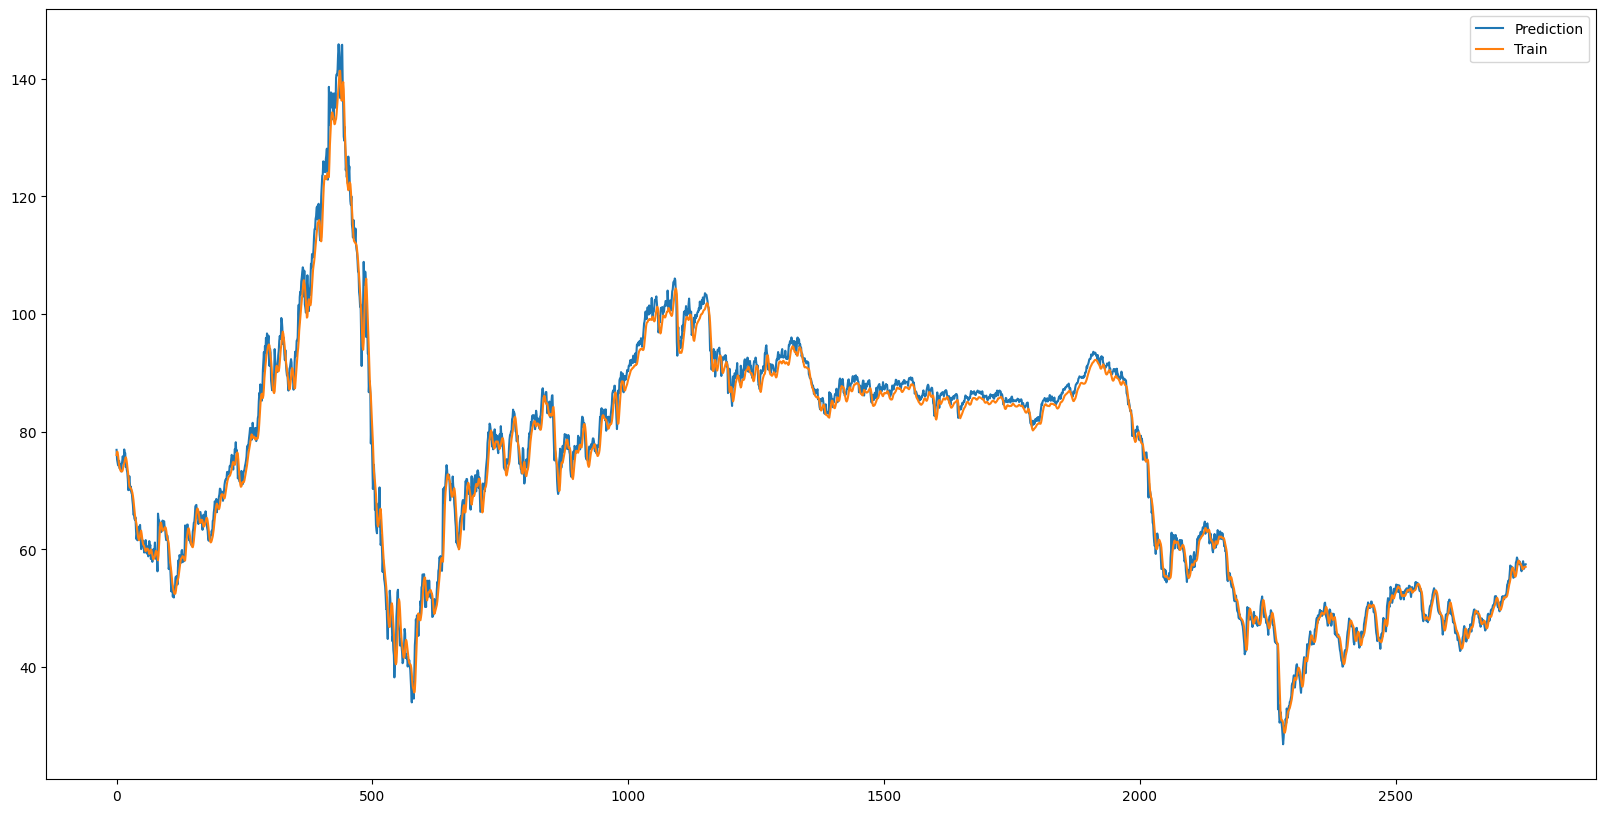

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(y_train)
plt.plot(train_pred)
plt.legend({"Train", "Prediction"})
plt.show()

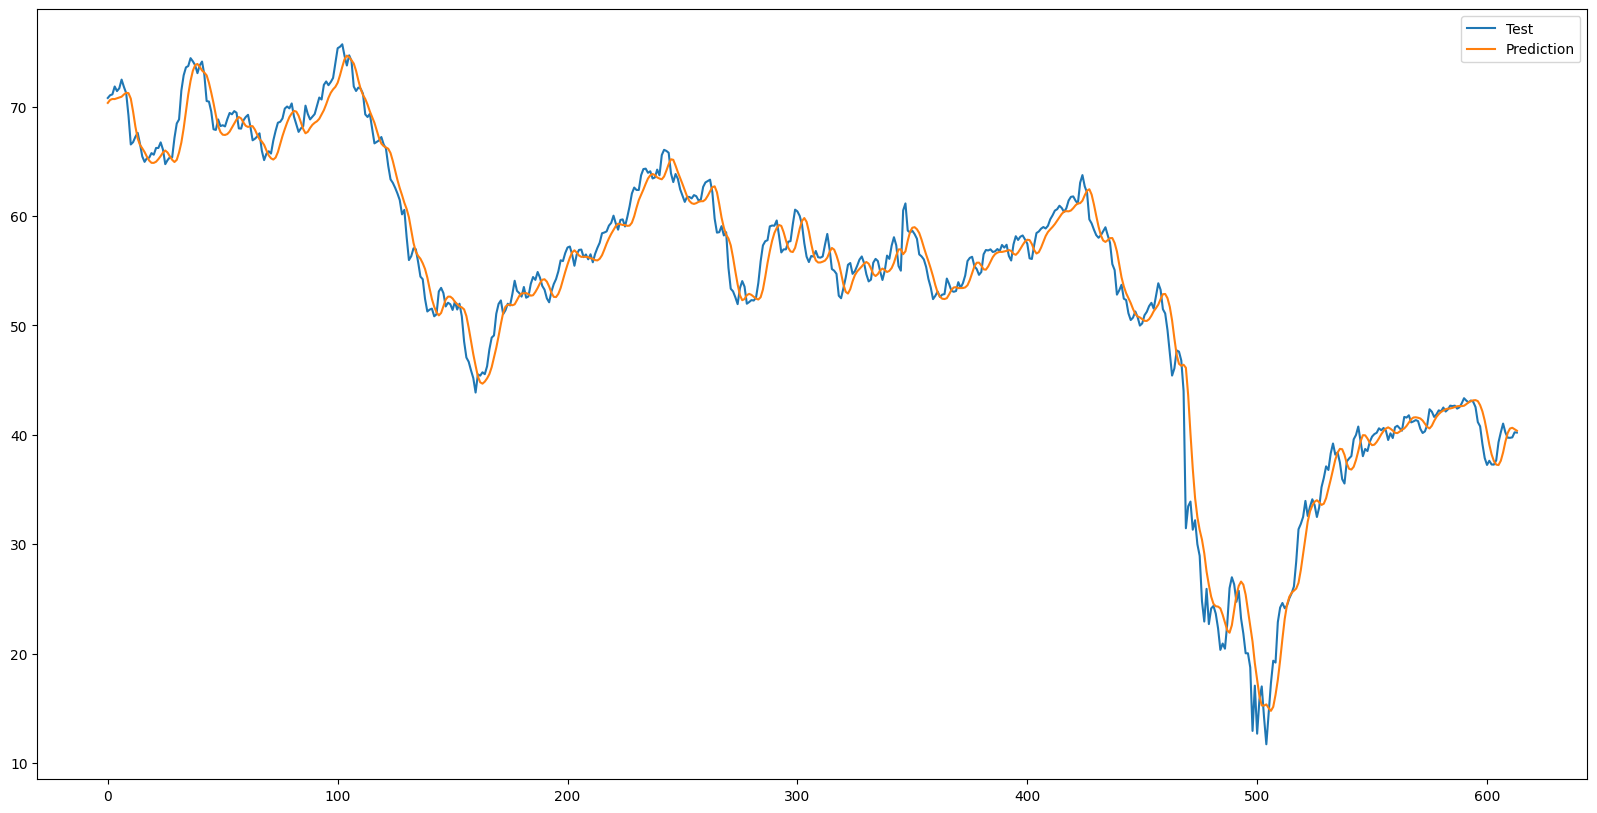

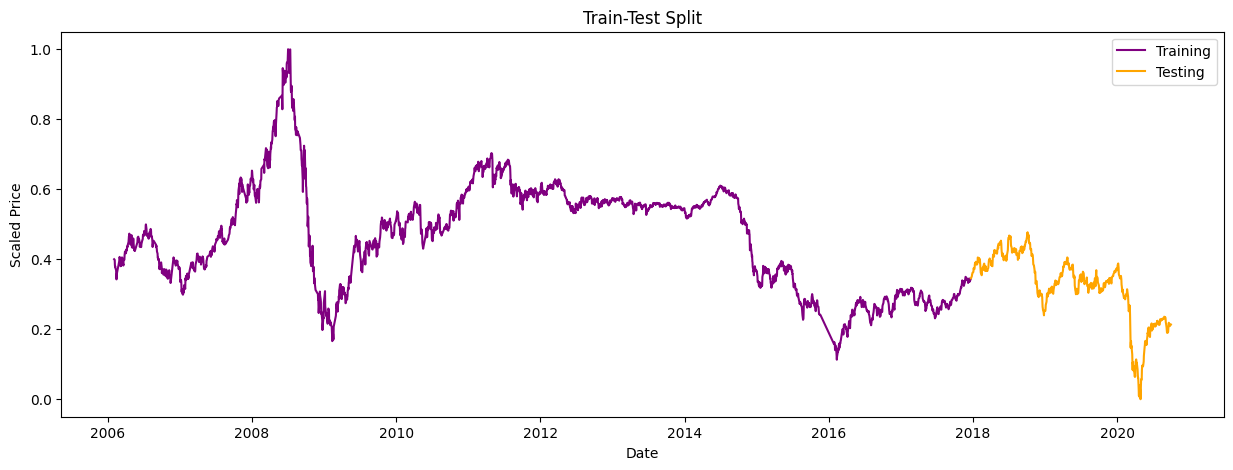

In [37]:
plt.figure(figsize=(20, 10))
plt.plot(y_test)
plt.plot(test_pred)
plt.legend({"Test", "Prediction"})
plt.show()

plt.figure(figsize=(15,5))
plt.plot(train_dates, train_data, color='purple', label='Training')
plt.plot(test_dates, test_data, color='orange', label='Testing')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.title('Train-Test Split')
plt.legend()
plt.show()

<div style="text-align: left;">
    <h1 style="font-size:26px;font-weight: bold;">&star; Plotting a slice of the above charts along with dates:</h1>
</div>


In [38]:
print(len(train_dates)) 
print(y_train.shape)     

2856
(2755, 1)


In [39]:
# Finding the minimum length between dates and training data
min_len = min(len(train_dates), len(y_train))
min_len

2755

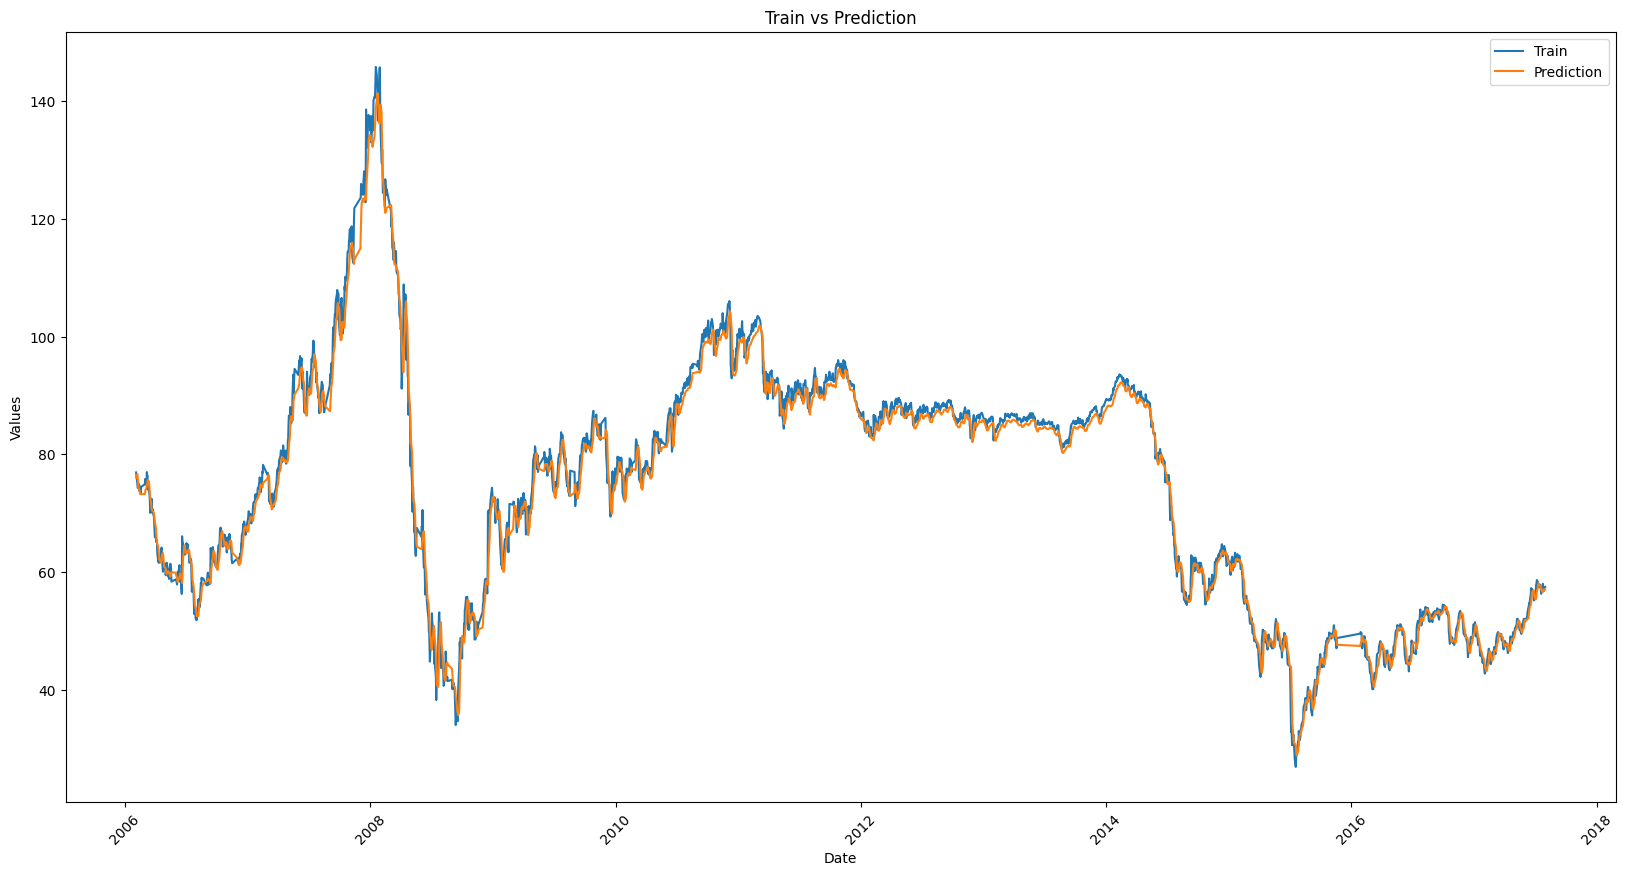

In [40]:
# Finding the minimum length between dates and training data
min_len = min(len(train_dates), len(y_train))

# Slicing the dates and data to the minimum length
train_dates_cutt = train_dates[:min_len]

# Slicing the actual and predicted values based on matching dates
y_train_cutt = y_train[:min_len]
train_pred_cutt = train_pred[:min_len]

# Plotting the chart
plt.figure(figsize=(20, 10))
plt.plot(train_dates_cutt, y_train_cutt, label='Train')
plt.plot(train_dates_cutt, train_pred_cutt, label='Prediction')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Train vs Prediction')
plt.xticks(rotation=45)
plt.show()


<div dir="rtl";style="text-align: RIGHT;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-size: 26px;">ترسيم نمودار Train_Validation_Loss:
        </h1>
</div>

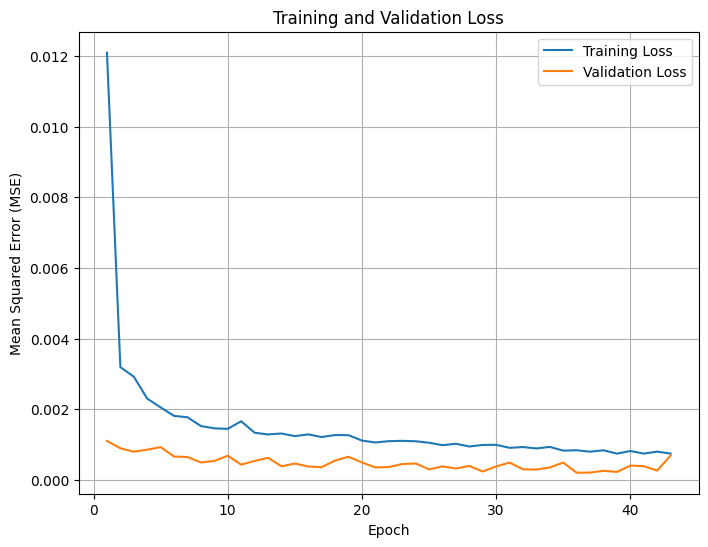

In [41]:
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(np.arange(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
mae, mse = mean_absolute_error(y_test, test_pred), mean_squared_error(y_test,test_pred)

In [43]:
mae, mse

(1.375797, 3.664202)

<div style="text-align: left;">
    <h1 style="font-size:26px;">&star; Evaluating the model based on synthetic data:</h1>
</div>


In [44]:
model1_save_path

WindowsPath('D:/Desktop File/New folder/src/BestModel_H5/model1_h5')

In [45]:
# Loading Pickle scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Load your trained model
model1 = load_model(model1_save_path)

# Step 1: Prepare New Data for Prediction
np.random.seed(2024)  # For reproducibility
dates = pd.date_range(start='2020-09-30', periods=110, freq='D')  # Use more data to meet time_step requirement
close_prices = np.random.uniform(low=30, high=80, size=110)  # Generate more data

new_data = pd.DataFrame({'Date2': dates, 'Close2': close_prices})
new_data.set_index('Date2', inplace=True)

# Step 2: Scale the New Data
new_data_scaled = scaler.transform(new_data[['Close2']])

# Step 3: Create Dataset for LSTM
def create_dataset(dataset, timestep=1):
    dataX = []
    for i in range(len(dataset) - timestep):
        dataX.append(dataset[i:i+timestep])
    return np.array(dataX).astype('float32')

X_new = create_dataset(new_data_scaled, time_step)
X_new = X_new.reshape((X_new.shape[0], X_new.shape[1], 1))  # Reshape for LSTM

# Step 4: Predict Using the Trained Model
new_pred = model1.predict(X_new)

# Step 5: Inverse Transform the Predictions
new_pred = scaler.inverse_transform(new_pred)

# Step 6: Compare Predictions with Actual Data
comparison_df = pd.DataFrame({
    'Date': new_data.index[time_step:],  # Adjust index to match the predictions
    'Actual': new_data['Close2'][time_step:],
    'Predicted': new_pred.flatten()
})

# Compute the error
comparison_df['Error'] = np.abs(comparison_df['Actual'] - comparison_df['Predicted'])
mae = comparison_df['Error'].mean()  # Mean Absolute Error
mse = np.mean(np.square(comparison_df['Actual'] - comparison_df['Predicted']))  # Mean Squared Error

# Print the updated DataFrame and MAE
print(comparison_df)
print(f'Mean Absolute Error (MAE): {mae:.4f}')
# print(f'Mean Squared Error (MSE): {mse:.4f}')


1/1 [==============================] - 1s 892ms/step
                 Date     Actual  Predicted      Error
Date2                                                 
2021-01-08 2021-01-08  56.586630  59.864445   3.277815
2021-01-09 2021-01-09  73.547931  56.731709  16.816223
2021-01-10 2021-01-10  72.054513  57.527237  14.527276
2021-01-11 2021-01-11  78.602777  61.094307  17.508470
2021-01-12 2021-01-12  69.112860  66.533371   2.579490
2021-01-13 2021-01-13  39.851525  70.362869  30.511344
2021-01-14 2021-01-14  60.531303  67.209457   6.678154
2021-01-15 2021-01-15  53.942775  62.857925   8.915150
2021-01-16 2021-01-16  60.831850  58.572212   2.259638
2021-01-17 2021-01-17  36.996662  56.357422  19.360760
Mean Absolute Error (MAE): 12.2434


<div dir="ltr";style="text-align: LEFT;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&star; 
        Building and training LSTM model with tf.data.Dataset API Approach:
        </h1>
</div>

<div style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">The tf.data Module in TensorFlow: A Powerful Tool for Data Management</h1>
    <p style="font-size: 16px; text-align: justify;">
        The tf.data.Dataset API is a powerful and flexible tool for managing and preprocessing data in TensorFlow. This API is particularly well-suited for working with large and complex datasets, as well as for enhancing model training efficiency in distributed environments (such as using GPUs and TPUs).
    </p>
    <p style="font-size: 16px; text-align: justify;"><strong>Advantages:</strong></p>
    <ul style="font-size: 16px; text-align: justify;">
        <li><strong>High Performance:</strong>
            This API allows you to manage data in memory and process it in parallel (using the Catch tool for memory management and Prefetch for parallel execution on CPU and GPU), which significantly improves data processing efficiency.
        </li>
        <li><strong>Flexibility:</strong>
            tf.data supports a wide range of data formats and allows you to perform complex operations on the data.
        </li>
        <li><strong>Scalability:</strong>
            The tf.data.Dataset API can easily work with very large datasets that do not fit into memory. This API enables you to process data in batches or shards.
        </li>
        <li><strong>Easy Distribution:</strong>
            Using this API, data is automatically distributed across multiple GPUs or TPUs, which significantly speeds up training.
        </li>
        <li><strong>Integration with Models:</strong>
            This API integrates well with TensorFlow and Keras models, providing a direct data flow to the models.
        </li>
    </ul>
    <br>
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">Pipelining and the Concepts of Batch and Prefetch and Auto Tuning Syntax:</h1>
    <li><strong>batch() function:</strong>
        Divides data into groups of a specified size (the number of samples per batch). Instead of processing one sample at a time, the model processes multiple samples simultaneously.
    </li>
    <li><strong>prefetch() function:</strong>
        Allows data loading and preparation to occur in parallel with model training. This means that while the model is training on one batch, the next batch is prepared in the background.
    </li>
</div>
<br><br/>
<div style="text-align: left;font-weight: bold;">
    AUTOTUNE = tf.data.AUTOTUNE
    <br/>
    train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
    <br/>
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
</div>


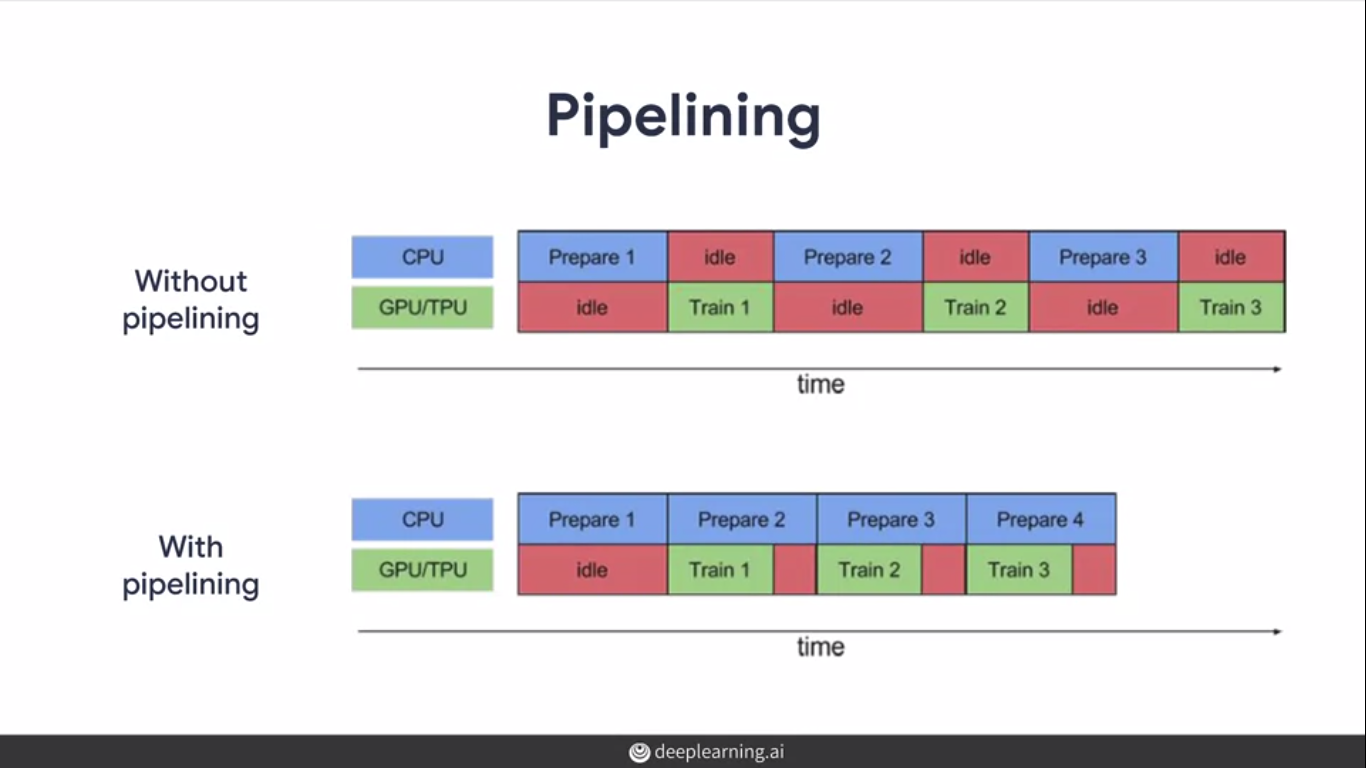

In [60]:
# The data has been previously scaled and is ready.
# train_data and test_data have already been prepared.

WINDOW = 14
BATCH_SIZE = 32

# Creating sequences for training and test data
def create_tf_dataset(dataset, window_size, batch_size):
    """Create a TensorFlow dataset from the given dataset.

    Args:
        dataset: The input dataset.
        window_size: The size of the windows.
        batch_size: The size of the batches.

    Returns:
        A TensorFlow dataset ready for use in model training.
    """
    ds = tf.data.Dataset.from_tensor_slices(dataset)

    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)

    ds = ds.flat_map(lambda x: x.batch(window_size + 1))

    ds = ds.map(lambda x: (x[:-1], x[-1]))

    ds = ds.batch(batch_size).prefetch(1)

    return ds

train_dataset = create_tf_dataset(train_data, WINDOW, BATCH_SIZE)
test_dataset = create_tf_dataset(test_data, WINDOW, BATCH_SIZE)

# Creating the LSTM model
model2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(WINDOW, 1)),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(200),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1)
])

model2.compile(loss='mean_squared_error', optimizer='adam')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=6, 
                               restore_best_weights=True)

# Define the path where the best model will be saved (as an H5 file)
model2_save_path = DATA_DIR / "BestModel_H5" / "model2_h5"

# Create a ModelCheckpoint callback that will save the model
checkpoint = ModelCheckpoint(
    model2_save_path,  # Path to save the model file
    monitor='val_loss',  # Monitor validation loss to determine when to save the model
    save_best_only=True,  # Only save the model if it improves (lower val_loss)
    mode='min',  # We're looking to minimize val_loss, hence mode='min'
    verbose=1  # Verbose=1 enables printing messages when the model is saved
)

# Training the model
history2 = model2.fit(train_dataset, 
                      epochs=100, 
                      validation_data=test_dataset,
                      callbacks=[early_stopping, checkpoint])


Epoch 1/100
     89/Unknown - 14s 110ms/step - loss: 0.0165
Epoch 1: val_loss improved from inf to 0.00964, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 25s 238ms/step - loss: 0.0165 - val_loss: 0.0096
Epoch 2/100
89/89 [==============================] - ETA: 0s - loss: 0.0151
Epoch 2: val_loss did not improve from 0.00964
89/89 [==============================] - 13s 144ms/step - loss: 0.0151 - val_loss: 0.0185
Epoch 3/100
89/89 [==============================] - ETA: 0s - loss: 0.0248
Epoch 3: val_loss did not improve from 0.00964
89/89 [==============================] - 14s 158ms/step - loss: 0.0248 - val_loss: 0.0189
Epoch 4/100
89/89 [==============================] - ETA: 0s - loss: 0.0256
Epoch 4: val_loss did not improve from 0.00964
89/89 [==============================] - 14s 155ms/step - loss: 0.0256 - val_loss: 0.0103
Epoch 5/100
89/89 [==============================] - ETA: 0s - loss: 0.0184
Epoch 5: val_loss improved from 0.00964 to 0.00720, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 25s 278ms/step - loss: 0.0184 - val_loss: 0.0072
Epoch 6/100
89/89 [==============================] - ETA: 0s - loss: 0.0162
Epoch 6: val_loss improved from 0.00720 to 0.00494, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 31s 349ms/step - loss: 0.0162 - val_loss: 0.0049
Epoch 7/100
89/89 [==============================] - ETA: 0s - loss: 0.0113
Epoch 7: val_loss improved from 0.00494 to 0.00302, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 31s 352ms/step - loss: 0.0113 - val_loss: 0.0030
Epoch 8/100
89/89 [==============================] - ETA: 0s - loss: 0.0055
Epoch 8: val_loss improved from 0.00302 to 0.00226, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 30s 343ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 9/100
89/89 [==============================] - ETA: 0s - loss: 0.0049
Epoch 9: val_loss improved from 0.00226 to 0.00124, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 31s 354ms/step - loss: 0.0049 - val_loss: 0.0012
Epoch 10/100
89/89 [==============================] - ETA: 0s - loss: 0.0018
Epoch 10: val_loss improved from 0.00124 to 0.00064, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 31s 354ms/step - loss: 0.0018 - val_loss: 6.3620e-04
Epoch 11/100
89/89 [==============================] - ETA: 0s - loss: 0.0018
Epoch 11: val_loss did not improve from 0.00064
89/89 [==============================] - 21s 237ms/step - loss: 0.0018 - val_loss: 9.2765e-04
Epoch 12/100
89/89 [==============================] - ETA: 0s - loss: 0.0020
Epoch 12: val_loss improved from 0.00064 to 0.00063, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 34s 381ms/step - loss: 0.0020 - val_loss: 6.2969e-04
Epoch 13/100
89/89 [==============================] - ETA: 0s - loss: 0.0035
Epoch 13: val_loss did not improve from 0.00063
89/89 [==============================] - 21s 237ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 14/100
89/89 [==============================] - ETA: 0s - loss: 0.0080
Epoch 14: val_loss did not improve from 0.00063
89/89 [==============================] - 19s 212ms/step - loss: 0.0080 - val_loss: 0.0022
Epoch 15/100
89/89 [==============================] - ETA: 0s - loss: 0.0066
Epoch 15: val_loss did not improve from 0.00063
89/89 [==============================] - 17s 197ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 16/100
89/89 [==============================] - ETA: 0s - loss: 0.0063
Epoch 16: val_loss did not improve from 0.00063
89/89 [==============================] - 17s 191ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 17/100
89/89 [==========================

INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 29s 326ms/step - loss: 0.0021 - val_loss: 4.0280e-04
Epoch 19/100
89/89 [==============================] - ETA: 0s - loss: 0.0017
Epoch 19: val_loss did not improve from 0.00040
89/89 [==============================] - 19s 210ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 20/100
89/89 [==============================] - ETA: 0s - loss: 0.0029
Epoch 20: val_loss did not improve from 0.00040
89/89 [==============================] - 19s 209ms/step - loss: 0.0029 - val_loss: 6.1619e-04
Epoch 21/100
89/89 [==============================] - ETA: 0s - loss: 0.0021
Epoch 21: val_loss did not improve from 0.00040
89/89 [==============================] - 19s 218ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 22/100
89/89 [==============================] - ETA: 0s - loss: 0.0053
Epoch 22: val_loss did not improve from 0.00040
89/89 [==============================] - 20s 229ms/step - loss: 0.0053 - val_loss: 8.4075e-04
Epoch 23/100
89/89 [==================

INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 30s 338ms/step - loss: 0.0025 - val_loss: 3.2215e-04
Epoch 24/100
89/89 [==============================] - ETA: 0s - loss: 0.0013
Epoch 24: val_loss improved from 0.00032 to 0.00030, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 29s 328ms/step - loss: 0.0013 - val_loss: 2.9776e-04
Epoch 25/100
89/89 [==============================] - ETA: 0s - loss: 0.0012
Epoch 25: val_loss improved from 0.00030 to 0.00028, saving model to D:\Desktop File\New folder\src\BestModel_H5\model2_h5


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


INFO:tensorflow:Assets written to: D:\Desktop File\New folder\src\BestModel_H5\model2_h5\assets


89/89 [==============================] - 29s 323ms/step - loss: 0.0012 - val_loss: 2.7870e-04
Epoch 26/100
89/89 [==============================] - ETA: 0s - loss: 0.0012
Epoch 26: val_loss did not improve from 0.00028
89/89 [==============================] - 18s 205ms/step - loss: 0.0012 - val_loss: 3.7647e-04
Epoch 27/100
89/89 [==============================] - ETA: 0s - loss: 0.0015
Epoch 27: val_loss did not improve from 0.00028
89/89 [==============================] - 18s 207ms/step - loss: 0.0015 - val_loss: 5.5890e-04
Epoch 28/100
89/89 [==============================] - ETA: 0s - loss: 0.0015
Epoch 28: val_loss did not improve from 0.00028
89/89 [==============================] - 18s 201ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 29/100
89/89 [==============================] - ETA: 0s - loss: 0.0037
Epoch 29: val_loss did not improve from 0.00028
89/89 [==============================] - 20s 222ms/step - loss: 0.0037 - val_loss: 5.0515e-04
Epoch 30/100
89/89 [==============

In [61]:
# Model evaluation
test_loss = model2.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")

# Prediction with test data
test_pred2 = model2.predict(test_dataset)

# Converting predictions back to original scale
test_pred2 = scaler.inverse_transform(test_pred2)
y_test2 = scaler.inverse_transform(test_data[WINDOW:])

# Comparing predictions with actual data
comparison_df2 = pd.DataFrame({
    'Date': pd.date_range(start='2020-09-30', periods=len(test_pred2), freq='D'),
    'Actual': y_test2.flatten(),
    'Predicted': test_pred2.flatten()
})

print(comparison_df2)

22/22 [==============================] - 1s 46ms/step - loss: 2.7870e-04
Test Loss: 0.00027869726181961596
22/22 [==============================] - 2s 37ms/step
          Date  Actual  Predicted
0   2020-09-30   63.66  61.565147
1   2020-10-01   64.40  61.978401
2   2020-10-02   64.13  62.386959
3   2020-10-03   63.74  62.709965
4   2020-10-04   63.98  62.891331
..         ...     ...        ...
696 2022-08-27   39.73  40.226917
697 2022-08-28   39.77  40.321934
698 2022-08-29   40.23  40.350063
699 2022-08-30   40.21  40.412067
700 2022-08-31   40.35  40.490376

[701 rows x 3 columns]


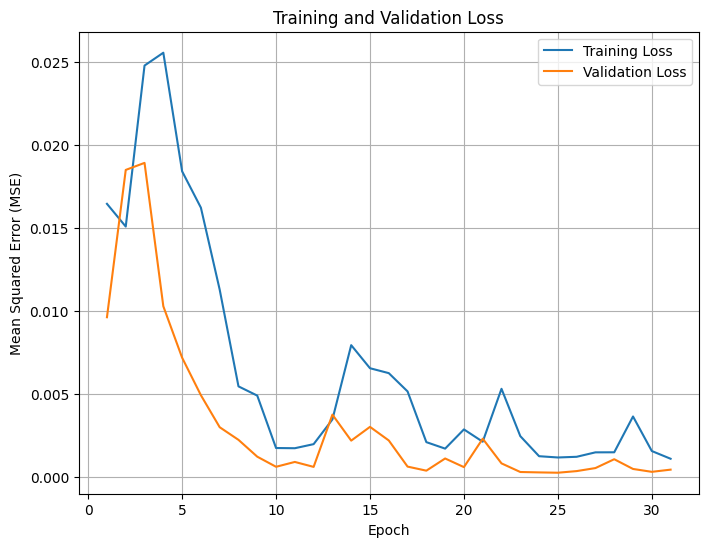

In [62]:
train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(train_loss2) + 1), train_loss2, label='Training Loss')
plt.plot(np.arange(1, len(val_loss2) + 1), val_loss2, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Loading the scaler
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Loading the trained model
model2 = load_model(model2_save_path)

# Step 1: Preparing new data for prediction
np.random.seed(1403)  # For reproducibility
dates = pd.date_range(start='2020-09-30', periods=110, freq='D')  # Using more data to meet the time_step requirement
close_prices = np.random.uniform(low=30, high=70, size=110)  # Generating more data

new_data = pd.DataFrame({'Date2': dates, 'Close2': close_prices})
new_data.set_index('Date2', inplace=True)

# Step 2: Scaling the new data
new_data_scaled = scaler.transform(new_data[['Close2']])

# Step 3: Creating sequences for LSTM
def create_tf_dataset(dataset, window_size, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(dataset)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda x: x.batch(window_size + 1))
    ds = ds.map(lambda x: (x[:-1], x[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds

batch_size = 32  # Must match the batch size used in the model
new_dataset = create_tf_dataset(new_data_scaled, WINDOW, batch_size)

# Step 4: Predicting with the trained model
new_pred = model2.predict(new_dataset)

# Step 5: Converting predictions back to original scale
new_pred = scaler.inverse_transform(new_pred)

# Step 6: Comparing predictions with actual data
comparison_df = pd.DataFrame({
    'Date': new_data.index[WINDOW:],  # Adjusting index to match predictions
    'Actual': new_data['Close2'][WINDOW:],
    'Predicted': new_pred.flatten()
})

# Calculating error
comparison_df['Error'] = np.abs(comparison_df['Actual'] - comparison_df['Predicted'])
mae = comparison_df['Error'].mean()  # Mean Absolute Error
mse = np.mean(np.square(comparison_df['Actual'] - comparison_df['Predicted']))  # Mean Squared Error

# Printing updated DataFrame and MAE
print(comparison_df)
print(f'Mean Absolute Error (MAE): {mae:.4f}')
# print(f'Mean Squared Error (MSE): {mse:.4f}')


3/3 [==============================] - 1s 39ms/step
                 Date     Actual  Predicted      Error
Date2                                                 
2020-10-14 2020-10-14  60.297439  55.404148   4.893291
2020-10-15 2020-10-15  53.867692  54.890060   1.022369
2020-10-16 2020-10-16  48.628671  54.616161   5.987490
2020-10-17 2020-10-17  68.090993  53.717365  14.373627
2020-10-18 2020-10-18  64.258327  55.045162   9.213165
...               ...        ...        ...        ...
2021-01-13 2021-01-13  48.725423  52.172848   3.447425
2021-01-14 2021-01-14  46.813155  50.780090   3.966935
2021-01-15 2021-01-15  44.769478  49.640556   4.871078
2021-01-16 2021-01-16  50.304174  48.473701   1.830472
2021-01-17 2021-01-17  61.691167  48.191498  13.499670

[96 rows x 4 columns]
Mean Absolute Error (MAE): 10.7220


###### Pls Notice To Outliers for Next Modify

<div style="text-align: left;">
    <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">&star; End of Step Six: Executing the LSTM Algorithm</h1>
</div>
